# Prediction on Animal Type

## Summary
The data set we will be using is Zoo (1990) provided by UC Irvine Machine Learning Repository. It stores data with 7 classes of animals and their related characteristics including animal name, hair, feathers and other attributes. In this project, we will use classification as our method to predict a most likely type of a given animal.
## Introduction
The earth is an amazing planet that cultivates branches of animals. In general, scholars split them into 12 classes including mammals, birds, reptiles, amphibians, fishes, insects, crustaceans, arachnids, echinoderms, worms, mollusks and sponges(BioExploer.net., 2022). The traditional way in animal classification is manually identifying the characteristics and attributing it the mostly close class (Manohar, Sharath, & Kumar, 2016). However, it is tedious and time consuming, especially when the data set is very huge. A question hereby comes to us, if we can apply K-nearest neighbors (KNN) algorithms in predicting the type an animal belongs to given its related characteristics, such as hair, feathers, etc.? Therefore, in this project, we will show how we use KNN to do classification in animals based on data set Zoo(1990) which contains 1 categorical attribute, 17 Boolean-valued attributes and 1 numerical attribute. The categorical attribute appears to be the class attribute. Detailed breakdowns are as follows:
1. animal name: Unique for each instance 
2. hair: Boolean 
3. feathers: Boolean 
4. eggs: Boolean 
5. milk: Boolean 
6. airborne: Boolean 
7. aquatic: Boolean 
8. predator: Boolean 
9. toothed: Boolean 
10. backbone: Boolean 
11. breathes: Boolean 
12. venomous: Boolean 
13. fins: Boolean 
14. legs: Numeric (set of values: {0,2,4,5,6,8}) 
15. tail: Boolean 
16. domestic: Boolean 
17. catsize: Boolean 
18. type: Numeric (integer values in range [1,7])

## Methods & Results
We are going to use multiple analysis to classify the type of the animals using 16 variables including hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize as our predictors. To predict the class of a new observation, the algorithms of each type will be further explained before implementation.

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from src.pre_processing import *
from src.train_and_predict_model import *
from src.std_acc import *

In [26]:
# reading the data as a csv from the uci web server, with header = false as the data contains no header
# Adding column names to the data
colm = ["animalName", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", 
        "predator", "toothed", "backbone", "breathes", "venomous", "fins", 
        "legs", "tail", "domestic", "catsize", "type"]

zoo_data = pre_process("https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data", colm)

In [27]:
#uncomment this line if the server is down for fetching the data
#zoo_data = pd.read_csv("./data/zoo.csv")
zoo_data.head()

,animalName,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


The first thing is to import the data. The data set is downloaded from [UCI repository]("https://archive-beta.ics.uci.edu/ml/datasets/zoo"). It is then saved as a csv file in this project repository. Some exploratory data analysis needs to be run before running the actual analyses on the data set.

In [28]:
# saving the data as a csv file in our data directory
# zoo_data.to_csv(r'./data/zoo.csv')

In [29]:
# Check if there are missing values
print("Whether the dataset contains missing value: " + str(zoo_data.isna().any().any()))

Whether the dataset contains missing value: False


In [30]:
# drop the first column
#zoo_data = zoo_data.drop(zoo_data.columns[[0,1]], axis=1)

In [31]:
# Create a summary of the data set, including descriptive statistics
zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


After checking whether there are missing values in the data set, we can clearly deduce that the data set is clean according to the data summary we generated above. Since most features are binary and categorical, there is no need to do normalization and standardization.

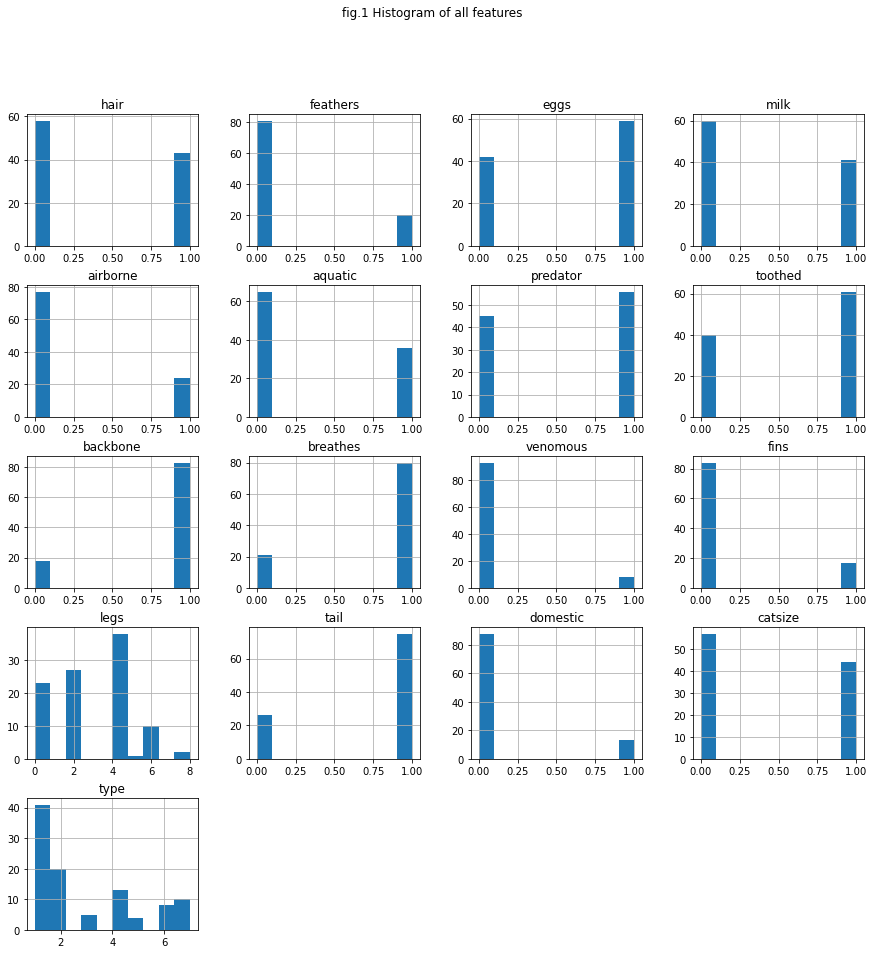

In [32]:
# Create a visualization of the dataset
zoo_data.hist(figsize=(15,15));
plt.suptitle("fig.1 Histogram of all features");

As shown in fig.1, the histograms of each feature are generated. The ones with skewed distribution might be more decisive in the prediction. However, since the data set is relatively small, all the features except the `animalName` are going to be used to predict. In the next part, we are going to split the data, into the training set and testing set. After that, different classification models will be trained and evaluated.

### Classification
Now we will use the training set to build an accurate model, whereas the testing set is used to report the accuracy of the models. Here is a list of algorithms we will use in the following section:

K Nearest Neighbor(KNN)
<br>
Decision Tree
<br>
Support Vector Machine
<br>
Logistic Regression

In [33]:
# extracting the feature that will predict
feature = zoo_data[["hair", "feathers", "eggs", "milk", "airborne", 
                   "aquatic", "predator", "toothed", "backbone", "breathes", 
                   "venomous", "fins", "legs", "tail", "domestic", "catsize"]]
# making it as a X
X = feature
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [34]:
# taking the y values, the type
y = zoo_data['type']
y[0:5]

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [35]:
# splitting the dataset 80-20 for train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print('Training set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Training set: (80, 16) (80,)
Test set: (21, 16) (21,)


#### KNN
KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) 
with some basic mathematics we might have learned earlier. Basically in terms of geometry we can always calculate the distance between points on a graph. Similarly, using KNN we can group similar points together and predict the target with our feature variables(x).

In [36]:
#training the model for different set of K values and finding the best K value
Ks = 81
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

std_acc = stdAcc(yhat,y_test,Ks)
mean_acc

array([1.        , 0.95238095, 0.95238095, 0.9047619 , 0.85714286,
       0.80952381, 0.85714286, 0.76190476, 0.76190476, 0.76190476,
       0.76190476, 0.76190476, 0.76190476, 0.76190476, 0.76190476,
       0.76190476, 0.76190476, 0.71428571, 0.61904762, 0.61904762,
       0.61904762, 0.61904762, 0.61904762, 0.61904762, 0.61904762,
       0.61904762, 0.61904762, 0.61904762, 0.61904762, 0.61904762,
       0.61904762, 0.61904762, 0.61904762, 0.57142857, 0.57142857,
       0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.47619048, 0.42857143, 0.42857143, 0.42857143, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333

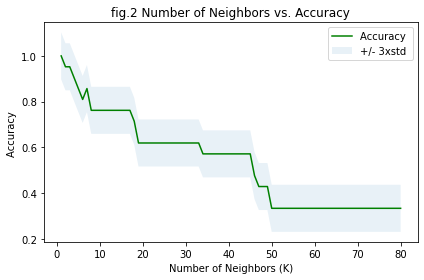

In [37]:
# plotting the aaccuracy for different K values
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.title('fig.2 Number of Neighbors vs. Accuracy')
plt.tight_layout()
plt.show()

In [38]:
print("The best accuracy was with the values", mean_acc.max(), "with k=", mean_acc.argmax()+1 )

The best accuracy was with the values 1.0 with k= 1


In [39]:
# Finding the K value using Grid Search
knn = KNeighborsClassifier()
k_vals = list(range(1, 21))
param_grid = dict(n_neighbors=k_vals)
grid = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'n_neighbors': 1}

#### KNN final model & Evaluation

In [40]:
# as the best accuracy was with K = 1
# using K = 1 for the final KNN model
# Final KNN model is here used the splited test part to train again for better training, and better prediction
# KNN evaluation is also here scroll through the output
final_knn_model = finalModel("KNN", 1, X_train, X_test, y_train, y_test, X, y)

KNN INFO: So the accuracy score for K = 1 is 1.0

KNN Cross Validate: 

fit_time       0.000000
score_time     0.005219
test_score     0.936847
train_score    1.000000
dtype: float64

KNN Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



#### Decision Tree
A decision tree is a decision support tool that uses a tree-like model of decisions and their 
possible consequences, including chance event outcomes, resource costs, and utility
The goal of using a Decision Tree is to create a training model that can use to predict 
the class or value of the target variable by learning simple decision rules inferred 
from prior data(training data).

In [41]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    # Train Model and Predict  
    decTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    decTree.fit(X_train,y_train)
    yhat=decTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

std_acc = stdAcc(yhat,y_test,Ks)
mean_acc

array([0.57142857, 0.61904762, 0.80952381, 0.80952381, 0.9047619 ,
       0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 ,
       0.85714286, 0.9047619 , 0.85714286, 0.9047619 , 0.9047619 ,
       0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 ,
       0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 ,
       0.9047619 , 0.9047619 , 0.85714286, 0.9047619 , 0.9047619 ,
       0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 ,
       0.9047619 , 0.9047619 , 0.85714286, 0.85714286, 0.85714286,
       0.9047619 , 0.85714286, 0.9047619 , 0.9047619 , 0.85714286,
       0.9047619 , 0.9047619 , 0.9047619 , 0.85714286])

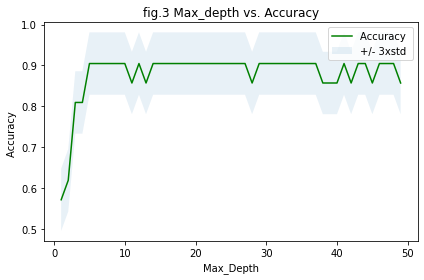

In [42]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max_Depth')
plt.title('fig.3 Max_depth vs. Accuracy')
plt.tight_layout()
plt.show()

In [43]:
print("The best accuracy was with the values", mean_acc.max(), "with max_depth =", mean_acc.argmax()+1)

The best accuracy was with the values 0.9047619047619048 with max_depth = 5


#### Decision Tree final model & evaluation

In [44]:
# As Best is max depth = 5
# using max depth = 5 for the final decision tree
# Final decision tree is here used the split test part to train again for better training, and better prediction
# DT evaluation is also here scroll through the output
Final_dec_Tree = finalModel("DT", 5, X_train, X_test, y_train, y_test, X, y)

DT INFO: So the accuracy score for max depth = 5 is 0.9523809523809523

DT Cross Validate: 

fit_time       0.000000
score_time     0.000000
test_score     0.925000
train_score    0.995833
dtype: float64

DT Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.75      1.00      0.86         3
           7       1.00      0.75      0.86         4

    accuracy                           0.95        21
   macro avg       0.96      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21



C:\Users\podda\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


#### Support Vector Machine
SVM or Support Vector Machine is a linear model for classification and regression problems. 
It can solve linear and non-linear problems and work well for many practical problems. 
The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the 
data into classes.

#### SVM training model Jaccard Score, final model and evaluation

In [45]:
#Final SVM is here used the splited test part to train again for better training, and better prediction
#svm evaluation train and final model is also here scroll through the output
svec = finalModel("SVM", -1, X_train, X_test, y_train, y_test, X, y)

SVM INFO: So the Training Jaccard score for SVM is: 0.8260869565217391

SVM Evaluation:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      0.50      0.67         4

    accuracy                           0.90        21
   macro avg       0.89      0.92      0.86        21
weighted avg       0.97      0.90      0.91        21



#### Logistic Regression
Logistic Regression is a "Supervised machine learning" algorithm that can be used to model the probability of a certain class or event. It is used when the data is linearly separable and the outcome is binary or dichotomous in nature. That means Logistic regression is usually used for Binary classification problems.

#### Logistic Regression training model Jaccard Score, final model and evaluation


In [46]:
# final LR model is here used the splited test part to train again for better training, and better prediction
# LR evaluation train and final model is also here scroll through the output
LR = finalModel("LR", -1, X_train, X_test, y_train, y_test, X, y)

LR INFO: So the Training Jaccard score for Logistic Regression is: 0.68

LR Evaluation: 

              precision    recall  f1-score   support

           1       0.88      1.00      0.93         7
           2       0.83      1.00      0.91         5
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           6       0.75      1.00      0.86         3
           7       1.00      0.25      0.40         4

    accuracy                           0.81        21
   macro avg       0.66      0.71      0.63        21
weighted avg       0.81      0.81      0.76        21



C:\Users\podda\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\podda\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\podda\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


</br>

## Discussion

After analyzing all the different 4 models K Nearest Neighbor(KNN), Decision Tree, Support Vector Machine and Logistic Regression, we found KNN is best to predict the animal type here. As you have seen in the model evaluation tables before, for accuracy KNN is the best, the second-best is decision tree method and following by Support Vector Machine and Logistic Regression. The result of KNN was expected as KNN is the best in grouping similar data points together and giving the best prediction results. Predicting the correct animal type with the highest accuracy have a huge impact on identifying animal types. These models can be used to identify animal types instantly for example if someone saw/discovered an animal and the type is not identified then they can feed all the characteristics fields to the model. The model can predict the animal type accurately, which is way more accurate than identifying and classifying the animal based on common sense. Thus our model can increase the research potential in many fields but not just limited to Marine Science, Animal Science, Forestry, and etc. This might lead to a future question in which how we are going to maintain the accuracy of predictions when working with more diverse groups of animals. Another possible aspect of this can be how some attributes of animals will relate to each other, for instance, relation between animals which has teeth vs predator. Furthermore, how we are going to use those relations to predict behaviors and attributes of newly discovered animals and how we are going to make our perceptions on animals even more detailed. These models and their advancements will not only widen our knowledge in terms of animal biology but will also let us find all other possible relations within the nature in a much more efficient way.

## Citation
BioExplorer.net. (2022, February 18). Types of Animals. Bio Explorer. https://www.bioexplorer.net/animals/.

N. Manohar, Y. H. Sharath Kumar and G. H. Kumar, \"Supervised and unsupervised learning in animal classification," *2016 International Conference on Advances in Computing, Communications and Informatics (ICACCI)*, 2016, pp. 156-161, doi: 10.1109/ICACCI.2016.7732040.

Tiffany Timbers, T. C. (2022, February 13). Data science: A first Introduction. Retrieved February 18, 2022, from https://datasciencebook.ca/. 

Zoo. (1990). UCI Machine Learning Repository.

Towards Data Science - Medium Articles.

IBM Data Science Resources.